In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import sweetviz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme(style="darkgrid")

In [3]:
#Reading the train data
train_data=pd.read_csv('train.csv')

In [4]:
#Reading the test data
test_data=pd.read_csv('test.csv')

In [5]:
#To view all columns
pd.set_option('display.max_columns',None)

In [6]:
test_data.shape

(292, 80)

In [7]:
#Viewing the train data
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

On viewing the data:
    Column id can be dropped, since it is unique representation of a property
    There are missing values in some columns
    The data consists of both numerical and categorical columns
    The target column is Sale Price - numerical & continuous. So we should apply regression model for prediction
    
    Let us explore each column

In [8]:
#Brief info of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

From above we can see the details like: Number of non missing values, and data types

In [9]:
#Dropping the column ID and reading data into new variable
df=train_data.drop('Id',axis=1)

In [10]:
#Exploring number of unique values in each column
df.nunique()

MSSubClass        15
MSZoning           5
LotFrontage      106
LotArea          892
Street             2
                ... 
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
SalePrice        581
Length: 80, dtype: int64

In [11]:
#Number of missing values in each column
pd.set_option('display.max_rows',None)
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

let us fix the missing values

In [12]:
col=df.columns
s=0
for i in col:
    n=df[i].isnull().sum()
    if  n > 0 :
        print(i,n)
        s=s+1
print('\nTotal number of columns with missing values:',s)   

LotFrontage 214
Alley 1091
MasVnrType 7
MasVnrArea 7
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
FireplaceQu 551
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageQual 64
GarageCond 64
PoolQC 1161
Fence 931
MiscFeature 1124

Total number of columns with missing values: 18


We can see there are 18 columns with missing values. Let us explore each column and decide how to fill missing values in each column

#### Linear feat of street connect to property

In [13]:
df['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

Based on the column description and observing the values, I am assuming that the values are nan since there is no LotFrontage. Therefore I am replacing the nan values with 0 in this column

In [14]:
#Filling nan with 0
df['LotFrontage'].fillna(0,inplace=True)

We filled the nan values in column LotFrontage with 0

In [15]:
#Checking for missing values
df['LotFrontage'].isnull().sum()

0

Now there are no missing values

#### Alley : Type of alley access to property

In [16]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [17]:
df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

There are 3 unique values, where nan means no alley access. So i am filling nan values with No alley access

In [18]:
#Filled null values with No alley access
df['Alley'].fillna('No alley access',inplace=True)

In [19]:
#Checking for missing values
df['Alley'].isnull().sum()

0

Now there are no null values

#### MasVnrType : Masonry veneer type

In [21]:
#Checking unique values
df['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [22]:
#No of counts of each value
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

There are only 7 missing values, we can fill these by comparing with price ,or with mode or by assuming they are left blank due to none

In [23]:
#Filling null values as nan inorder to compare prices
df['MasVnrType'].fillna('nan',inplace=True)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

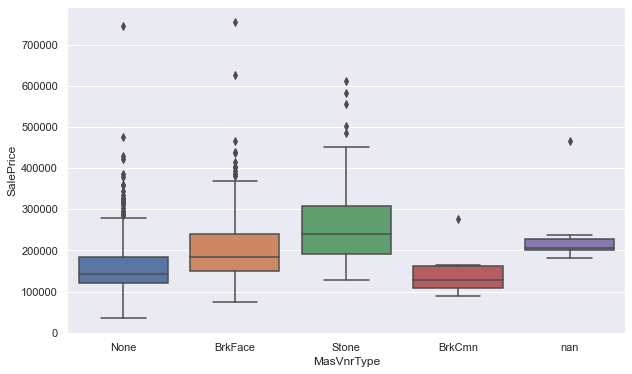

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['MasVnrType'],y=df['SalePrice'])

from graph we can see the nan values price is more than 75% of none value ones. So i am assuming these values as BrkFace and fill them with BrkFace

In [25]:
df['MasVnrType'].replace('nan','BrkFace',inplace=True)

#### MasVnrArea : Masonry veneer area in sq.ft

In [26]:
df['MasVnrArea'].describe()

count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

There are only 7 rows with missing data. from statistical observation  we can see mean > median and skewness is present. So i am filling these with median

In [27]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

filled the missing values with median

In [28]:
#Checking for missing values
df['MasVnrArea'].isnull().sum()

0

No missing values now.

#### BsmtQual : Evalutes the height of basement

It is given in description of column, that Na representsno basement. So filling nan with No basement

In [29]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [30]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [31]:
df['BsmtQual'].fillna('NA',inplace=True)

Filled the missing values as NA - which represents no basement.But typically basement is must. So we will compare with prices and replace this NA with relevant type

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtQual'>

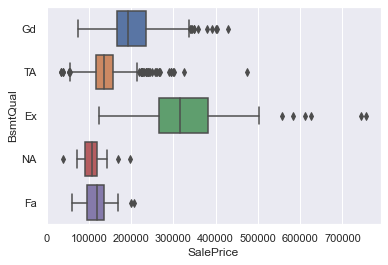

In [32]:
sns.boxplot(df['SalePrice'],df['BsmtQual'])

No missing values now

#### BsmtCond : Evaluates condition of Basement

In [33]:
print(df['BsmtCond'].unique())
df['BsmtCond'].value_counts()

['TA' 'Gd' 'Fa' nan 'Po']


TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

I am assuming it is left blank since there is no basement

In [34]:
df['BsmtCond'].fillna('NA',inplace=True)

Filled missing values with NA : that represents No Basemen

#### BsmtExposure : Refers to walkout or garden level wall

In [35]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [36]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

From given details, left blank if there is no basement. So filling the missing values with NA 

In [37]:
df['BsmtExposure'].fillna('NA',inplace=True)

Filled nan values with NA

#### BsmtFinType1 : Rating of basement finshed area

In [39]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

Filling missing values with NA

In [40]:
df['BsmtFinType1'].fillna('NA',inplace=True)

#### BsmtFinType2 : Rating of basement finshed area (If multiples)

In [41]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [42]:
df['BsmtFinType2'].fillna('NA',inplace=True)

#### FireplaceQu : Quality of Fireplace

In [43]:
df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

If number of fireplaces is 0, we will fill it with NA else we will fill it with mode

In [44]:
x=df[df['Fireplaces']==0]

In [45]:
x.loc[:,['Fireplaces','FireplaceQu']]

Fireplaces FireplaceQu
8              0         NaN
9              0         NaN
12             0         NaN
13             0         NaN
14             0         NaN
16             0         NaN
17             0         NaN
19             0         NaN
21             0         NaN
22             0         NaN
23             0         NaN
24             0         NaN
26             0         NaN
33             0         NaN
35             0         NaN
39             0         NaN
41             0         NaN
42             0         NaN
43             0         NaN
44             0         NaN
45             0         NaN
47             0         NaN
48             0         NaN
52             0         NaN
53             0         NaN
54             0         NaN
58             0         NaN
59             0         NaN
62             0         NaN
64             0         NaN
66             0         NaN
67             0         NaN
69             0         NaN
70             0         NaN
71             0         NaN
72             0         NaN
73             0         NaN
74             0         NaN
76             0         NaN
77             0         NaN
80             0         NaN
81             0         NaN
84             0         NaN
86             0         NaN
89             0         NaN
92             0         NaN
95             0         NaN
97             0         NaN
98             0         NaN
99             0         NaN
100            0         NaN
101            0         NaN
107            0         NaN
109            0         NaN
116            0         NaN
118            0         NaN
121            0         NaN
122            0         NaN
123            0         NaN
124            0         NaN
127            0         NaN
128            0         NaN
129            0         NaN
132            0         NaN
135            0         NaN
137            0         NaN
144            0         NaN
147            0         NaN
148            0         NaN
149            0         NaN
154            0         NaN
155            0         NaN
158            0         NaN
159            0         NaN
160            0         NaN
161            0         NaN
164            0         NaN
167            0         NaN
169            0         NaN
172            0         NaN
173            0         NaN
174            0         NaN
175            0         NaN
176            0         NaN
177            0         NaN
180            0         NaN
182            0         NaN
184            0         NaN
185            0         NaN
187            0         NaN
195            0         NaN
196            0         NaN
197            0         NaN
201            0         NaN
203            0         NaN
205            0         NaN
207            0         NaN
208            0         NaN
209            0         NaN
210            0         NaN
212            0         NaN
213            0         NaN
218            0         NaN
224            0         NaN
225            0         NaN
227            0         NaN
229            0         NaN
230            0         NaN
231            0         NaN
235            0         NaN
237            0         NaN
238            0         NaN
242            0         NaN
247            0         NaN
248            0         NaN
249            0         NaN
252            0         NaN
253            0         NaN
256            0         NaN
258            0         NaN
263            0         NaN
265            0         NaN
268            0         NaN
271            0         NaN
272            0         NaN
276            0         NaN
277            0         NaN
278            0         NaN
279            0         NaN
285            0         NaN
289            0         NaN
292            0         NaN
293            0         NaN
297            0         NaN
299            0         NaN
302            0         NaN
306            0         NaN
307 

In [46]:
len(x)

551

we can see NaN is present wherever there is no fireplace.So we will fill these missing values with NA

In [47]:
df['FireplaceQu'].fillna('NA',inplace=True)

#### GarageType : Garage Location

In [48]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

Given when there is no garrage, it is left blank

In [49]:
df['GarageType'].fillna('NA',inplace=True)

#### GarageYrBlt: Year Garrage was built

wherever there is no garrage, then it should be blank. we will check and verify before filling as NA

In [50]:
x=df[df['GarageType']=='NA']

In [51]:
x.loc[:,['GarageType','GarageYrBlt']]

GarageType  GarageYrBlt
48           NA          NaN
72           NA          NaN
74           NA          NaN
105          NA          NaN
116          NA          NaN
123          NA          NaN
127          NA          NaN
149          NA          NaN
180          NA          NaN
184          NA          NaN
197          NA          NaN
227          NA          NaN
314          NA          NaN
327          NA          NaN
333          NA          NaN
378          NA          NaN
396          NA          NaN
420          NA          NaN
429          NA          NaN
468          NA          NaN
474          NA          NaN
491          NA          NaN
510          NA          NaN
537          NA          NaN
545          NA          NaN
546          NA          NaN
548          NA          NaN
584          NA          NaN
585          NA          NaN
597          NA          NaN
614          NA          NaN
615          NA          NaN
636          NA          NaN
655          NA          NaN
656          NA          NaN
664          NA          NaN
683          NA          NaN
696          NA          NaN
718          NA          NaN
726          NA          NaN
731          NA          NaN
769          NA          NaN
775          NA          NaN
804          NA          NaN
811          NA          NaN
831          NA          NaN
846          NA          NaN
867          NA          NaN
884          NA          NaN
902          NA          NaN
952          NA          NaN
956          NA          NaN
959          NA          NaN
1018         NA          NaN
1023         NA          NaN
1035         NA          NaN
1046         NA          NaN
1065         NA          NaN
1107         NA          NaN
1117         NA          NaN
1139         NA          NaN
1145         NA          NaN
1149         NA          NaN
1159         NA          NaN

In [52]:
len(x)

64

Confirmed that , wherever there is no garrage, there it is left blank. So we will fill this with 0

In [53]:
df['GarageYrBlt'].fillna(0,inplace=True)

In [54]:
from datetime import date
current_date= date.today()
current_year=current_date.year
current_year

2022

In [55]:
#For better info , we will change the yrbltinfo to number of years old from current year
df['GarageYrBlt']=current_year-df['GarageYrBlt']

Now this will give better info

#### GarageFinish, GarageQual , GarageCond -

In [56]:
x.loc[:,['GarageType','GarageFinish','GarageQual','GarageCond']]

GarageType GarageFinish GarageQual GarageCond
48           NA          NaN        NaN        NaN
72           NA          NaN        NaN        NaN
74           NA          NaN        NaN        NaN
105          NA          NaN        NaN        NaN
116          NA          NaN        NaN        NaN
123          NA          NaN        NaN        NaN
127          NA          NaN        NaN        NaN
149          NA          NaN        NaN        NaN
180          NA          NaN        NaN        NaN
184          NA          NaN        NaN        NaN
197          NA          NaN        NaN        NaN
227          NA          NaN        NaN        NaN
314          NA          NaN        NaN        NaN
327          NA          NaN        NaN        NaN
333          NA          NaN        NaN        NaN
378          NA          NaN        NaN        NaN
396          NA          NaN        NaN        NaN
420          NA          NaN        NaN        NaN
429          NA          NaN        NaN        NaN
468          NA          NaN        NaN        NaN
474          NA          NaN        NaN        NaN
491          NA          NaN        NaN        NaN
510          NA          NaN        NaN        NaN
537          NA          NaN        NaN        NaN
545          NA          NaN        NaN        NaN
546          NA          NaN        NaN        NaN
548          NA          NaN        NaN        NaN
584          NA          NaN        NaN        NaN
585          NA          NaN        NaN        NaN
597          NA          NaN        NaN        NaN
614          NA          NaN        NaN        NaN
615          NA          NaN        NaN        NaN
636          NA          NaN        NaN        NaN
655          NA          NaN        NaN        NaN
656          NA          NaN        NaN        NaN
664          NA          NaN        NaN        NaN
683          NA          NaN        NaN        NaN
696          NA          NaN        NaN        NaN
718          NA          NaN        NaN        NaN
726          NA          NaN        NaN        NaN
731          NA          NaN        NaN        NaN
769          NA          NaN        NaN        NaN
775          NA          NaN        NaN        NaN
804          NA          NaN        NaN        NaN
811          NA          NaN        NaN        NaN
831          NA          NaN        NaN        NaN
846          NA          NaN        NaN        NaN
867          NA          NaN        NaN        NaN
884          NA          NaN        NaN        NaN
902          NA          NaN        NaN        NaN
952          NA          NaN        NaN        NaN
956          NA          NaN        NaN        NaN
959          NA          NaN        NaN        NaN
1018         NA          NaN        NaN        NaN
1023         NA          NaN        NaN        NaN
1035         NA          NaN        NaN        NaN
1046         NA          NaN        NaN        NaN
1065         NA          NaN        NaN        NaN
1107         NA          NaN        NaN        NaN
1117         NA          NaN        NaN        NaN
1139         NA          NaN        NaN        NaN
1145         NA          NaN        NaN        NaN
1149         NA          NaN        NaN        NaN
1159         NA          NaN        NaN        NaN

we can see there are missing values wherever there is no garrage only, so we will fill with NA

In [57]:
co=['GarageQual','GarageFinish','GarageCond']
for c in co:
    df[c].fillna('NA',inplace=True)

Filled in these 3 columns with NA

In [58]:
co=['GarageQual','GarageFinish','GarageCond']
for c in co:
    print(df[c].isnull().sum())

0
0
0


PoolQC: Pool quality condition

In [59]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [60]:
df.shape

(1168, 80)

We can see many properties doesn't have pool, so i am dropping this column

In [61]:
df.drop('PoolQC',axis=1,inplace=True)

In [62]:
1161/1168

0.9940068493150684

dropped the column, since 99% of the houses doesn't have pool

#### MiscFeature : Miscellaneous features not covered in other fields

In [63]:
1124/1168

0.9623287671232876

we can drop this column, since 96% of houses doesnt have

In [64]:
df.drop('MiscFeature',axis=1,inplace=True)

#### Fence : Fence Quality

it is given , there is no fence if left blank

In [65]:
df['Fence'].fillna('NA',inplace=True)

Filled missing values with NA

Checking now any missing values in any column

In [66]:
col=df.columns
s=0
for i in col:
    n=df[i].isnull().sum()
    if  n > 0 :
        print(i,n)
        s=s+1
        
print('\nTotal number of columns with missing values:',s)  


Total number of columns with missing values: 0


We can see,now there are no missing value

### Exploring each column

MsSubClass : Identifies the type of dwelling involved in the sale

In [67]:
#No.of unique values
df['MSSubClass'].nunique()

15

In [68]:
#Viewing the unique values
df['MSSubClass'].unique()

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

##### Let us understand what those values denote:
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
These are categorical values, denoted interms of numbers.

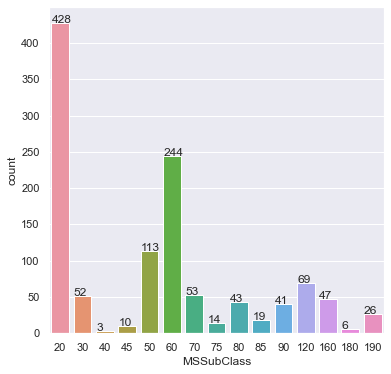

In [69]:
#Let us see the count of each value in this column
plt.figure(figsize=(6,6))
ax=sns.countplot(df['MSSubClass'])
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.01, p.get_height()+0.01))

Making other instance of data

In [70]:
df1=df.copy(deep=True)

In [71]:
#Brief statistics of dataset
df1.describe(include='all')

MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000     1168  1168.000000    1168.000000   1168   
unique          NaN        5          NaN            NaN      2   
top             NaN       RL          NaN            NaN   Pave   
freq            NaN      928          NaN            NaN   1164   
mean      56.767979      NaN    57.982021   10484.749144    NaN   
std       41.940650      NaN    35.471226    8957.442311    NaN   
min       20.000000      NaN     0.000000    1300.000000    NaN   
25%       20.000000      NaN    41.750000    7621.500000    NaN   
50%       50.000000      NaN    64.000000    9522.500000    NaN   
75%       70.000000      NaN    79.250000   11515.500000    NaN   
max      190.000000      NaN   313.000000  164660.000000    NaN   

                  Alley LotShape LandContour Utilities LotConfig LandSlope  \
count              1168     1168        1168      1168      1168      1168   
unique                3        4           4         1         5         3   
top     No alley access      Reg         Lvl    AllPub    Inside       Gtl   
freq               1091      740        1046      1168       842      1105   
mean                NaN      NaN         NaN       NaN       NaN       NaN   
std                 NaN      NaN         NaN       NaN       NaN       NaN   
min                 NaN      NaN         NaN       NaN       NaN       NaN   
25%                 NaN      NaN         NaN       NaN       NaN       NaN   
50%                 NaN      NaN         NaN       NaN       NaN       NaN   
75%                 NaN      NaN         NaN       NaN       NaN       NaN   
max                 NaN      NaN         NaN       NaN       NaN       NaN   

       Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
count          1168       1168       1168     1168       1168  1168.000000   
unique           25          9          8        5          8          NaN   
top           NAmes       Norm       Norm     1Fam     1Story          NaN   
freq            182       1005       1154      981        578          NaN   
mean            NaN        NaN        NaN      NaN        NaN     6.104452   
std             NaN        NaN        NaN      NaN        NaN     1.390153   
min             NaN        NaN        NaN      NaN        NaN     1.000000   
25%             NaN        NaN        NaN      NaN        NaN     5.000000   
50%             NaN        NaN        NaN      NaN        NaN     6.000000   
75%             NaN        NaN        NaN      NaN        NaN     7.000000   
max             NaN        NaN        NaN      NaN        NaN    10.000000   

        OverallCond    YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
count   1168.000000  1168.000000   1168.000000      1168     1168        1168   
unique          NaN          NaN           NaN         6        8          14   
top             NaN          NaN           NaN     Gable  CompShg     VinylSd   
freq            NaN          NaN           NaN       915     1144         396   
mean       5.595890  1970.930651   1984.758562       NaN      NaN         NaN   
std        1.124343    30.145255     20.785185       NaN      NaN         NaN   
min        1.000000  1875.000000   1950.000000       NaN      NaN         NaN   
25%        5.000000  1954.000000   1966.000000       NaN      NaN         NaN   
50%        5.000000  1972.000000   1993.000000       NaN      NaN         NaN   
75%        6.000000  2000.000000   2004.000000       NaN      NaN         NaN   
max        9.000000  2010.000000   2010.000000       NaN      NaN         NaN   

       Exterior2nd MasVnrType   MasVnrArea ExterQual ExterCond Foundation  \
count         1168       1168  1168.000000      1168      1168       1168   
unique          15          4          NaN         4         5          6   
top        VinylSd       None          NaN        TA        TA     CBlock   
freq           387        696          NaN       

In [72]:
#Seperating all categorical columns
categorical = df1.select_dtypes(include='object')

Finding the value counts in columns, if any having only one variety

In [73]:
for c in categorical.columns:
    count=df1[c].nunique()
    if count == 1:
        print(c,count)

Utilities 1


there is only one column, utilities with 1 value

In [74]:
df1['Utilities'].unique()

array(['AllPub'], dtype=object)

the value is Allpub, i.e all services are available for all the propertiesin the data. So we can drop this column

In [75]:
df1.drop('Utilities', axis=1,inplace=True)

So before encoding, we will merge test dataset to make sure encoded correctly and drop them.

In [76]:
df2=pd.DataFrame({})
cols=df1.columns
cols=cols[:-1]
for i in cols:
    df2[i]=test_data[i]
df2

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            20       RL         86.0    14157   Pave   NaN      IR1   
1           120       RL          NaN     5814   Pave   NaN      IR1   
2            20       RL          NaN    11838   Pave   NaN      Reg   
3            70       RL         75.0    12000   Pave   NaN      Reg   
4            60       RL         86.0    14598   Pave   NaN      IR1   
5           180       RM         21.0     1936   Pave   NaN      Reg   
6           180       RM         35.0     3675   Pave   NaN      Reg   
7            20       RL        107.0    13891   Pave   NaN      Reg   
8            80       RL          NaN    12800   Pave   NaN      Reg   
9           120       RM         32.0     4500   Pave   NaN      Reg   
10           30       RM         60.0     6324   Pave   NaN      IR1   
11           20       RL          NaN     9503   Pave   NaN      Reg   
12           20       RL        100.0    21750   Pave   NaN      Reg   
13           20       RL         50.0    35133   Grvl   NaN      Reg   
14           20       RL        110.0    14226   Pave   NaN      Reg   
15           50       RL         50.0     8405   Pave  Grvl      Reg   
16           20       RL          NaN     8780   Pave   NaN      IR1   
17           20       RL         70.0     9100   Pave   NaN      Reg   
18          160       FV         35.0     3735   Pave   NaN      Reg   
19          160       RL         44.0     5306   Pave   NaN      IR1   
20           70       RM         50.0     9000   Pave   NaN      Reg   
21           20       RL         71.0     8197   Pave   NaN      Reg   
22           20       RL          NaN    10355   Pave   NaN      IR1   
23          190       RM         70.0     5600   Pave   NaN      Reg   
24           30       RL         52.0     6292   Pave   NaN      Reg   
25           20       RL         37.0     6951   Pave   NaN      IR1   
26           60       RL         62.0     7917   Pave   NaN      Reg   
27           20       RL         78.0     7800   Pave   NaN      Reg   
28           60       RL         90.0    11700   Pave   NaN      Reg   
29           30       RM         60.0     9786   Pave   NaN      Reg   
30           90       RM         68.0     8930   Pave   NaN      Reg   
31           20       RL         67.0    10083   Pave   NaN      Reg   
32           20       RL         70.0     9100   Pave   NaN      Reg   
33           20       RL         80.0    11900   Pave   NaN      IR1   
34           30       RL         52.0     9022   Pave   NaN      Reg   
35           80       RL         76.0     9967   Pave   NaN      IR1   
36           60       RL         70.0     8462   Pave   NaN      IR1   
37          160       RM         21.0     1680   Pave   NaN      Reg   
38           60       RL          NaN    12936   Pave   NaN      IR1   
39          160       RL         24.0     2289   Pave   NaN      Reg   
40           20       RM         50.0     6000   Pave   NaN      Reg   
41           60       RL         80.0     9200   Pave   NaN      Reg   
42           60       RL          NaN    12394   Pave   NaN      IR1   
43           20       FV         62.0     7500   Pave  Pave      Reg   
44           85       RL         57.0     8846   Pave   NaN      IR1   
45           50       RM         52.0     6240   Pave   NaN      Reg   
46           20       RL         70.0     7560   Pave   NaN      Reg   
47           30       RM         30.0     5232   Pave  Grvl      IR3   
48          120       RL         34.0     5001   Pave   NaN      IR1   
49           20       RL         86.0    13286   Pave   NaN      IR1   
50           50       RL         60.0    10998   Pave  Grvl      Reg   
51           20       RL          NaN     9819   Pave   NaN      IR1   
52           50       RM         50.0     6060   Pave   NaN      Reg   
53           45       RL         55.0    10594   Pave   NaN      Reg   
54           60       RL         79.0    1020

In [77]:
df2.fillna('NA',inplace=True)

In [78]:
#Adding new column to identify columns train or test data
df1['data']='train'
df2['data']='test'

In [79]:
#changing the year values to number of years old

yr_cols = ['YrSold','YearBuilt','YearRemodAdd']
for i in yr_cols:
    df2[i]=current_year-df2[i]
    
for i in yr_cols:
    if i == 'YrSold':
        pass
    else:
        df1[i]=current_year-df1[i]

In [80]:
ds=pd.concat([df1,df2],ignore_index=True)

In [81]:
cate = df1.select_dtypes(include='object')

In [82]:
#Encoding all other features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cate = df1.select_dtypes(include='object')
for c in cate.columns:
    if c == 'data':
        pass
    else:
        ds[c]=le.fit_transform(ds[c])
    
ds

MSSubClass  MSZoning LotFrontage  LotArea  Street  Alley  LotShape  \
0            120         3         0.0     4928       1      2         0   
1             20         3        95.0    15865       1      2         0   
2             60         3        92.0     9920       1      2         0   
3             20         3       105.0    11751       1      2         0   
4             20         3         0.0    16635       1      2         0   
5             60         3        58.0    14054       1      2         0   
6             20         3         0.0    11341       1      2         0   
7             20         3        88.0    13125       1      2         3   
8             20         3        70.0     9170       1      2         3   
9             50         3        80.0     8480       1      2         3   
10            50         4        50.0     8600       1      2         3   
11            60         3        44.0     9548       1      2         0   
12            20         3       129.0     9196       1      2         0   
13            20         3        80.0     8892       1      2         0   
14            50         3        59.0    16466       1      2         0   
15            70         3        55.0    10592       1      2         3   
16            30         4         0.0     5890       1      2         3   
17            20         3        64.0     7314       1      2         3   
18            20         3         0.0     7917       1      2         0   
19           160         4        24.0     2016       1      2         3   
20            60         3        80.0    12435       1      2         3   
21            85         3        70.0     8445       1      2         3   
22            20         3        68.0     9717       1      2         3   
23            20         3         0.0    10659       1      2         0   
24            20         3        71.0     9230       1      2         3   
25            20         3         0.0    21000       1      2         3   
26            30         3         0.0    25339       1      2         3   
27            20         3        88.0    11394       1      2         3   
28            45         4        58.0     6380       1      2         3   
29            70         3        74.0    11988       1      2         0   
30           120         3        61.0     7658       1      2         3   
31            60         4        60.0     3378       1      0         3   
32            90         3         0.0    18890       1      2         0   
33            50         4         0.0    12358       1      2         0   
34            60         3         0.0    14762       1      2         1   
35            20         3       120.0    10356       1      2         3   
36            20         3        80.0    10400       1      2         3   
37            20         3        84.0    12615       1      2         3   
38            85         3         0.0     7540       1      2         0   
39            40         4        50.0     9100       1      2         3   
40            20         3       141.0    31770       1      2         0   
41            20         3        70.0    13300       1      2         3   
42           160         1        30.0     3180       1      3         3   
43           160         4        24.0     2522       1      2         3   
44            80         3        65.0     8385       1      2         3   
45            20         3        76.0     8314       1      2         3   
46            60         3        60.0     8123       1      2         0   
47            20         4       100.0    12000       1      2         3   
48            20         3        50.0     5000       1      2         3   
49            20         3        70.0     7931       1      2         3   
50            20         3        85.0    14331       1      2         3   
51            50         4        60.0    10440       

In [83]:
ds.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [84]:
#Splitting the train & test datasets
train_dt = ds[ds['data']=='train']
test_dt = ds[ds['data']=='test']

In [85]:
train_dt.shape

(1168, 78)

In [86]:
test_dt.shape

(292, 78)

In [87]:
#Dropping the column data from both the datasets
train_dt.drop('data',axis=1,inplace=True)
test_dt.drop(['SalePrice','data'],axis=1,inplace=True)

MSSubClass          AxesSubplot(0.125,0.840263;0.133621x0.0397368)
MSZoning         AxesSubplot(0.285345,0.840263;0.133621x0.0397368)
LotFrontage       AxesSubplot(0.44569,0.840263;0.133621x0.0397368)
LotArea          AxesSubplot(0.606034,0.840263;0.133621x0.0397368)
Street           AxesSubplot(0.766379,0.840263;0.133621x0.0397368)
Alley               AxesSubplot(0.125,0.792579;0.133621x0.0397368)
LotShape         AxesSubplot(0.285345,0.792579;0.133621x0.0397368)
LandContour       AxesSubplot(0.44569,0.792579;0.133621x0.0397368)
LotConfig        AxesSubplot(0.606034,0.792579;0.133621x0.0397368)
LandSlope        AxesSubplot(0.766379,0.792579;0.133621x0.0397368)
Neighborhood        AxesSubplot(0.125,0.744895;0.133621x0.0397368)
Condition1       AxesSubplot(0.285345,0.744895;0.133621x0.0397368)
Condition2        AxesSubplot(0.44569,0.744895;0.133621x0.0397368)
BldgType         AxesSubplot(0.606034,0.744895;0.133621x0.0397368)
HouseStyle       AxesSubplot(0.766379,0.744895;0.133621x0.0397

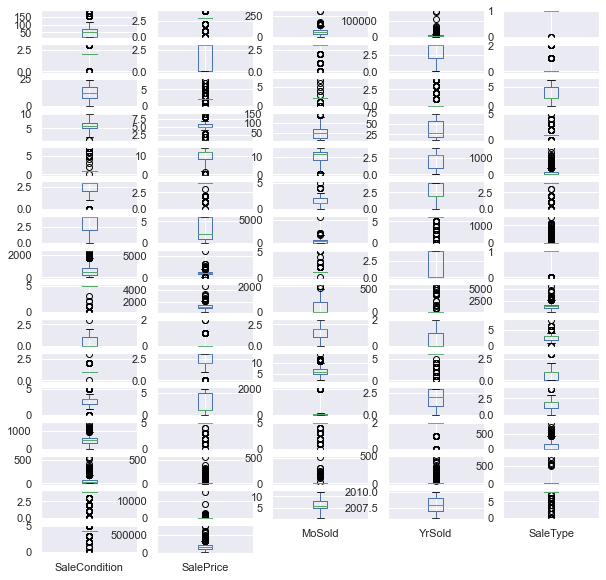

In [88]:
#exploring train_dt
#Viewing the presence of outliers
train_dt.plot(kind='box',subplots=True,figsize=(10,10),layout=(16,5))

In [89]:
#Checking the skewness
train_dt.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       0.364916
LotArea          10.659285
Street          -17.021969
Alley            -3.293268
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt         0.579204
YearRemodAdd      0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.750566
Exterior2nd      -0.699672
MasVnrType       -0.553573
MasVnrArea        2.835718
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -0.487530
BsmtCond         -2.816444
BsmtExposure     -0.960565
BsmtFinType1      0.100811
BsmtFinSF1        1.871606
BsmtFinType2     -3.144813
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

In categorical values, skewness no need to be rectified. In numerical columns only we need to decrease skewness

In [90]:
num_col=df1.select_dtypes(exclude='object').columns

In [91]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [92]:
#Viewing the skewness in numerical value columns which are not in acceptable range.
for col in num_col:
    skewness=train_dt[col].skew()
    if skewness > 5 or skewness < -5:
        print(col, skewness)

LotArea 10.659284548299626
LowQualFinSF 8.666142302049042
3SsnPorch 9.770611216755274
PoolArea 13.243710763499866
MiscVal 23.065942802581013


In [93]:
#Fixing the skewness: 
skew_co=['LotArea','LowQualFinSF','3SsnPorch','PoolArea','MiscVal']

#To check whether it have 0 in them 
train_dt[skew_co].describe()

LotArea  LowQualFinSF    3SsnPorch     PoolArea       MiscVal
count    1168.000000   1168.000000  1168.000000  1168.000000   1168.000000
mean    10484.749144      6.380137     3.639555     3.448630     47.315068
std      8957.442311     50.892844    29.088867    44.896939    543.264432
min      1300.000000      0.000000     0.000000     0.000000      0.000000
25%      7621.500000      0.000000     0.000000     0.000000      0.000000
50%      9522.500000      0.000000     0.000000     0.000000      0.000000
75%     11515.500000      0.000000     0.000000     0.000000      0.000000
max    164660.000000    572.000000   508.000000   738.000000  15500.000000

We can see there are 0 , i.e no particular thing. For removing skewness i there is 0,it wont work. So we use salting method. to remove

In [94]:
for i in skew_co:
    if i == 'LotArea':
        pass
    else:
        train_dt[i]=0.01+train_dt[i]

In [95]:
#Fixing the skewness: 
skew_co=['LotArea','LowQualFinSF','3SsnPorch','PoolArea','MiscVal']

#To check whether it have 0 in them 
train_dt[skew_co].describe()

LotArea  LowQualFinSF    3SsnPorch     PoolArea       MiscVal
count    1168.000000   1168.000000  1168.000000  1168.000000   1168.000000
mean    10484.749144      6.390137     3.649555     3.458630     47.325068
std      8957.442311     50.892844    29.088867    44.896939    543.264432
min      1300.000000      0.010000     0.010000     0.010000      0.010000
25%      7621.500000      0.010000     0.010000     0.010000      0.010000
50%      9522.500000      0.010000     0.010000     0.010000      0.010000
75%     11515.500000      0.010000     0.010000     0.010000      0.010000
max    164660.000000    572.010000   508.010000   738.010000  15500.010000

In [96]:
#Now we can apply log transformation to overcome skewness
train_dt['LotArea']=np.log(train_dt['LotArea'])

In [97]:
train_dt['LowQualFinSF']=np.log(train_dt['LowQualFinSF'])

In [98]:
train_dt['3SsnPorch']=np.log(train_dt['3SsnPorch'])

In [99]:
train_dt['PoolArea']=np.log(train_dt['PoolArea'])

In [100]:
train_dt['MiscVal']=np.log(train_dt['MiscVal'])

In [101]:
#Skewness after reduction
for i in skew_co:
    print(i,train_dt[i].skew())

LotArea -0.16967981002018756
LowQualFinSF 6.976729207636998
3SsnPorch 7.121515266540344
PoolArea 12.820509358358983
MiscVal 5.04874516583982


We can see the skewness is reduced

<AxesSubplot:>

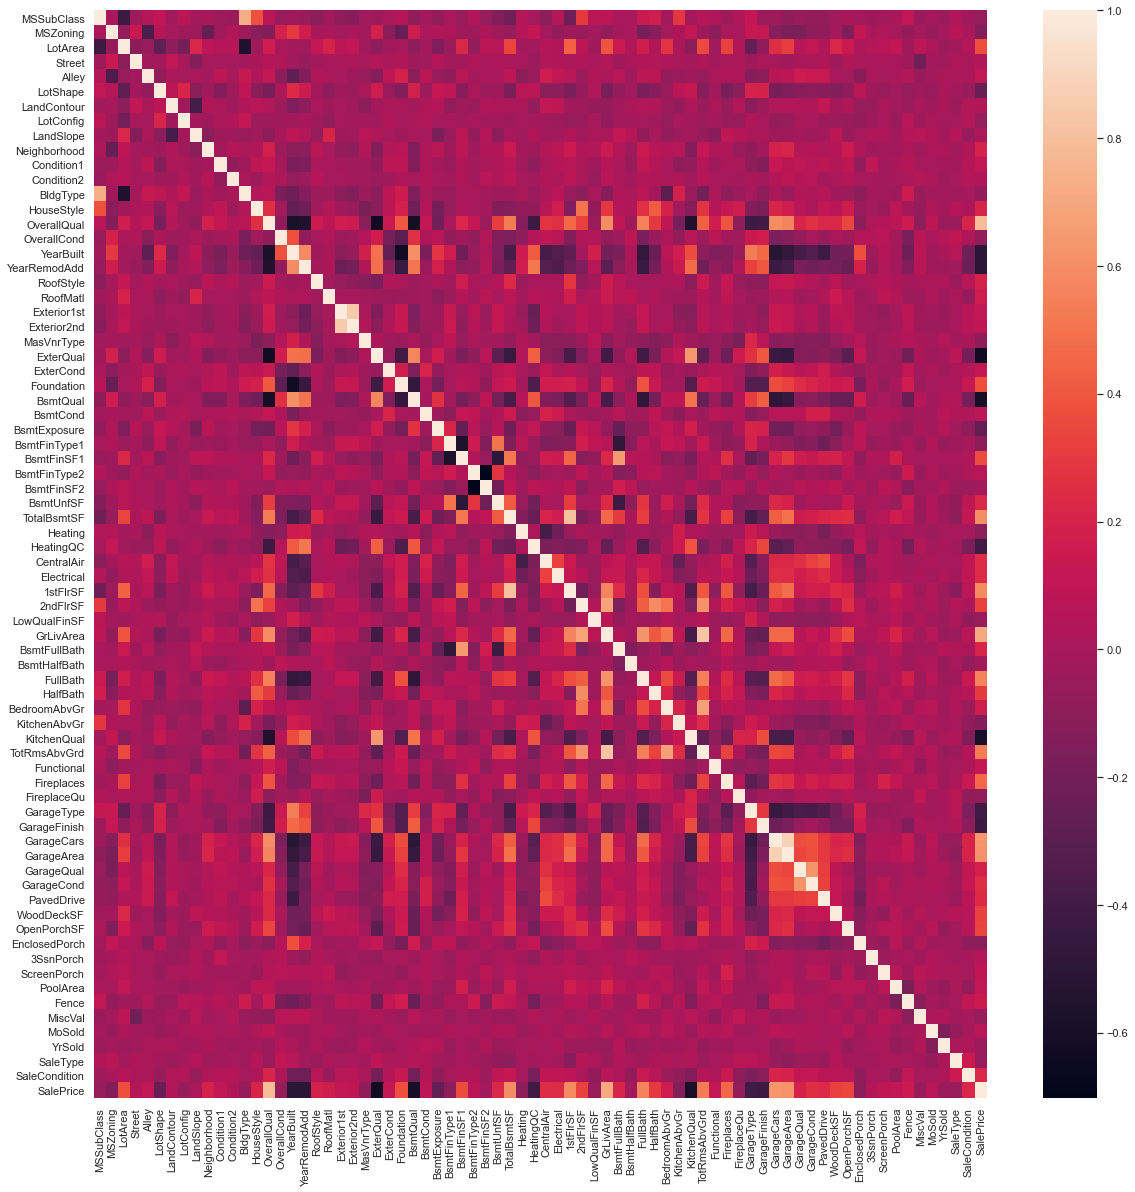

In [102]:
#Seeing the correlation
plt.figure(figsize=(20,20))
sns.heatmap(train_dt.corr())

From above we can't get clear idea or analyze

In [104]:
x=train_dt.drop('SalePrice',axis=1)
y=train_dt['SalePrice']

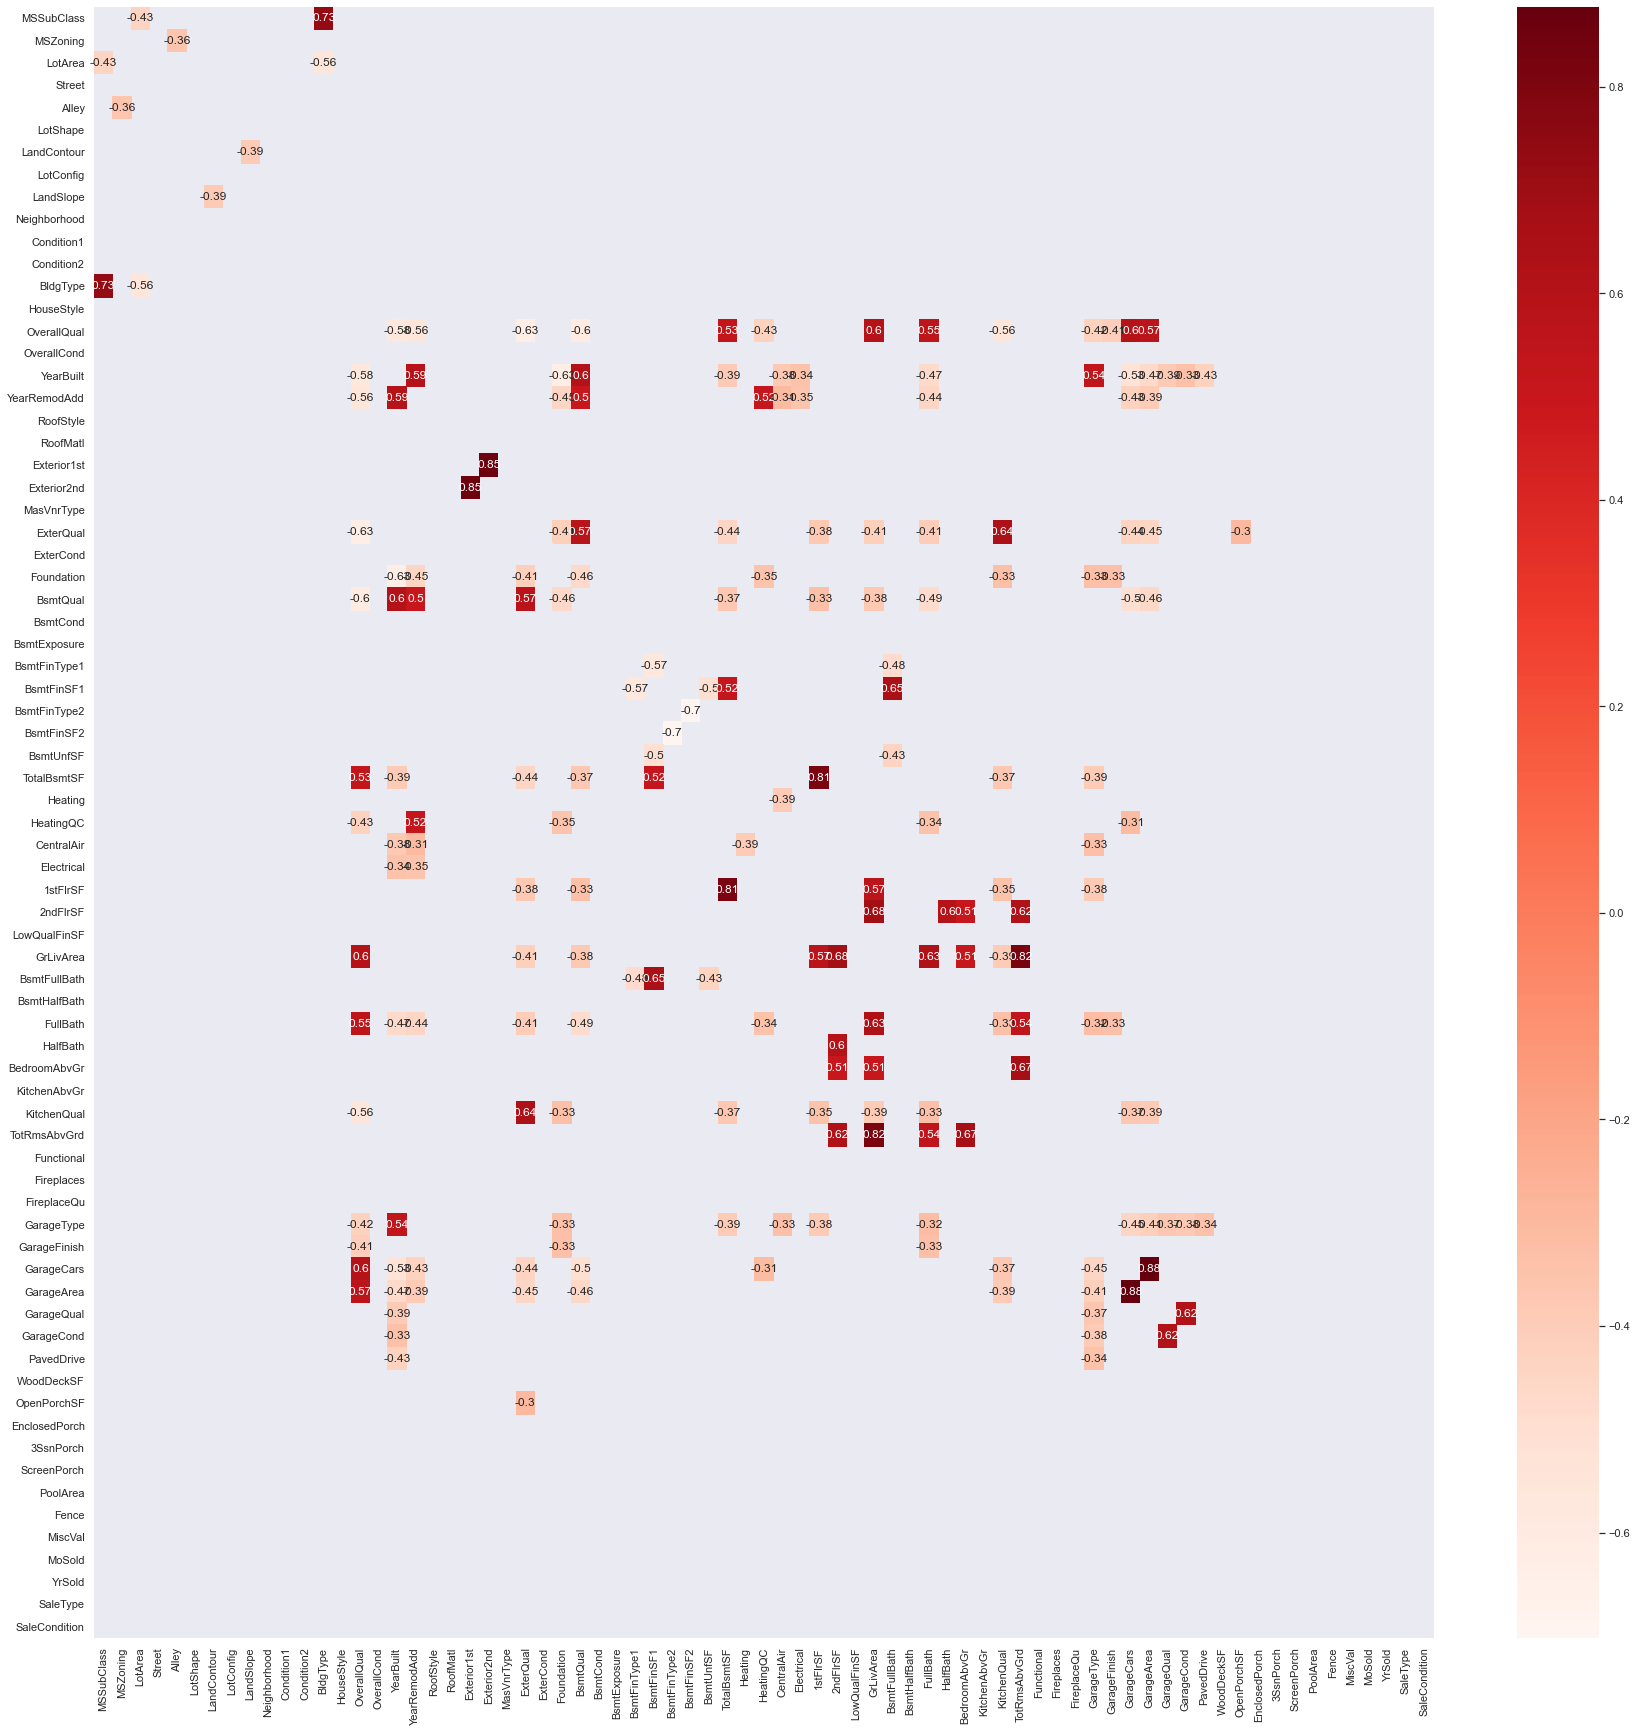

In [105]:
corr_matrix = x.corr()
threshold = 0.5
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000) | (corr_matrix <= -0.3)] 

plt.figure(figsize=(30,30))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

Now we can see the columns which are having corr of 0.5 and above

In [106]:
#Dropping the columns with high correlation
def correlation(data, threshold):
    global col_corr
    col_corr = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.append(col_name)
    return col_corr

In [113]:
correlation(x, 0.5)

[]

All the above columns have high correlation , more than 0.5.

In [108]:
#Dropping the columns with high correlation
x.drop(col_corr,axis=1,inplace=True)

In [109]:
test_dt.drop(col_corr, axis=1,inplace=True)

In [110]:
x.shape

(1168, 58)

In [112]:
test_dt.shape

(292, 58)

In [114]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

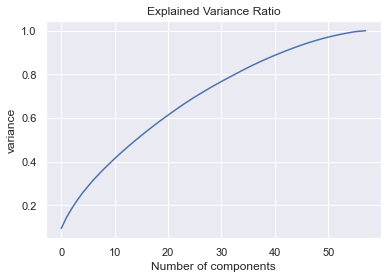

In [115]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio')
plt.xlabel('Number of components')
plt.ylabel ('variance')
plt.show()

we can see that 45 we can see that 45 components are having 95% of variance are having 95% of variance

In [116]:
pca = PCA(n_components = 45)
pca_x = pca.fit_transform(x_scaled)

In [117]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [118]:
#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [119]:
from sklearn.model_selection import cross_val_score
ml_models=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in ml_models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    mse=mean_squared_error(y_test,predm)
    mae=mean_absolute_error(y_test,predm)
    r2=r2_score(y_test,predm)
    print(f'metrics of {m}:')
    print('Training score:', m.score(x_train,y_train))
    print('Testing Score:',m.score(x_test,y_test))
    print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')
    score=cross_val_score(m,x_scaled,y, cv=5)
    print(' mean cv score:',score.mean())
    print('**'*20 , '\n')

metrics of LinearRegression():
Training score: 0.8457180250814662
Testing Score: 0.5960727847377933
 mean_absolute_error: 24845.17924829029
 mean_squared_error: 2752626456.4029117
 r2_score: 0.5960727847377933 
 mean cv score: 0.7216312376830658
**************************************** 

metrics of SVR():
Training score: -0.05591064704062787
Testing Score: -0.030699741451764906
 mean_absolute_error: 55381.5052683813
 mean_squared_error: 7023867839.868291
 r2_score: -0.030699741451764906 
 mean cv score: -0.062075842649206917
**************************************** 

metrics of RandomForestRegressor():
Training score: 0.975030343926441
Testing Score: 0.8245617337306516
 mean_absolute_error: 22005.56428082192
 mean_squared_error: 1195552057.2808778
 r2_score: 0.8245617337306516 
 mean cv score: 0.8217399527964566
**************************************** 

metrics of GradientBoostingRegressor():
Training score: 0.9589896630742526
Testing Score: 0.8393849823563955
 mean_absolute_error: 20

Gradient boosting regressor is giving good accuracy. Least difference between r2score and cv score. Also the model is bit overfit.

Selecting Gradient Boosting as my best model

In [120]:
#Makikng the model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 20070.149191706863
 mean_squared_error: 1059283553.831475
 r2_score: 0.8445581110081535 


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

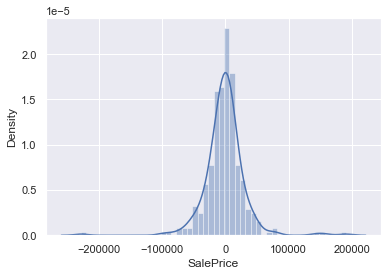

In [121]:
sns.distplot(y_test-pred)

In [122]:
#Tuning
from sklearn.model_selection import GridSearchCV
par={'n_estimators':range(100,1000,100),
     'min_samples_split':range(2,10,2),
     'min_samples_leaf':range(1,10)
    }
grid=GridSearchCV(gbr,param_grid=par, cv=5,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=300

In [125]:
#Makikng the model with tuned parameters
gbr=GradientBoostingRegressor(min_samples_leaf=2, n_estimators=700,min_samples_split = 2 )
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 19121.340203003805
 mean_squared_error: 962888295.1370342
 r2_score: 0.8587033897176399 


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

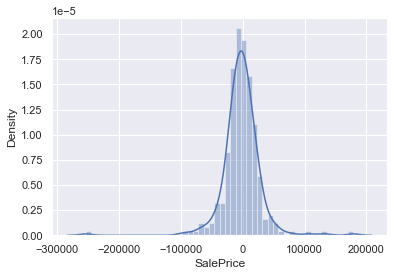

In [126]:
sns.distplot(y_test-pred)

<AxesSubplot:xlabel='SalePrice'>

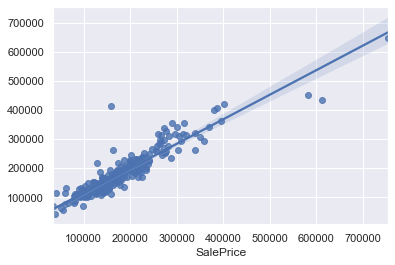

In [127]:
sns.regplot(y_test,pred)

accuracy increased from 84 to 86%

In [128]:
#saving the model
import pickle
file=open('housing.pkl','wb')
pickle.dump(gbr,file)

model is saved

predicting on the test dataset

In [129]:
columns = x.columns

In [130]:
test_dt_y=pd.DataFrame()
for col in columns:
    test_dt_y[col]=test_dt[col]

In [131]:
test_dt_y

MSSubClass  MSZoning LotFrontage  LotArea  Street  Alley  LotShape  \
1168          20         3        86.0    14157       1      1         0   
1169         120         3          NA     5814       1      1         0   
1170          20         3          NA    11838       1      1         3   
1171          70         3        75.0    12000       1      1         3   
1172          60         3        86.0    14598       1      1         0   
1173         180         4        21.0     1936       1      1         3   
1174         180         4        35.0     3675       1      1         3   
1175          20         3       107.0    13891       1      1         3   
1176          80         3          NA    12800       1      1         3   
1177         120         4        32.0     4500       1      1         3   
1178          30         4        60.0     6324       1      1         0   
1179          20         3          NA     9503       1      1         3   
1180          20         3       100.0    21750       1      1         3   
1181          20         3        50.0    35133       0      1         3   
1182          20         3       110.0    14226       1      1         3   
1183          50         3        50.0     8405       1      0         3   
1184          20         3          NA     8780       1      1         0   
1185          20         3        70.0     9100       1      1         3   
1186         160         1        35.0     3735       1      1         3   
1187         160         3        44.0     5306       1      1         0   
1188          70         4        50.0     9000       1      1         3   
1189          20         3        71.0     8197       1      1         3   
1190          20         3          NA    10355       1      1         0   
1191         190         4        70.0     5600       1      1         3   
1192          30         3        52.0     6292       1      1         3   
1193          20         3        37.0     6951       1      1         0   
1194          60         3        62.0     7917       1      1         3   
1195          20         3        78.0     7800       1      1         3   
1196          60         3        90.0    11700       1      1         3   
1197          30         4        60.0     9786       1      1         3   
1198          90         4        68.0     8930       1      1         3   
1199          20         3        67.0    10083       1      1         3   
1200          20         3        70.0     9100       1      1         3   
1201          20         3        80.0    11900       1      1         0   
1202          30         3        52.0     9022       1      1         3   
1203          80         3        76.0     9967       1      1         0   
1204          60         3        70.0     8462       1      1         0   
1205         160         4        21.0     1680       1      1         3   
1206          60         3          NA    12936       1      1         0   
1207         160         3        24.0     2289       1      1         3   
1208          20         4        50.0     6000       1      1         3   
1209          60         3        80.0     9200       1      1         3   
1210          60         3          NA    12394       1      1         0   
1211          20         1        62.0     7500       1      3         3   
1212          85         3        57.0     8846       1      1         0   
1213          50         4        52.0     6240       1      1         3   
1214          20         3        70.0     7560       1      1         3   
1215          30         4        30.0     5232       1      0         2   
1216         120         3        34.0     5001       1      1         0   
1217          20         3        86.0    13286       1      1         0   
1218          50         3        60.0    10998       1      0         3   
1219          20         3          NA     9819       

In [132]:
file=open('housing.pkl','rb')
prediction = pickle.load(file)
prediction

GradientBoostingRegressor(min_samples_leaf=2, n_estimators=700)

In [133]:
test_dt_y.replace('NA',0,inplace=True)

In [134]:
predicted_price=prediction.predict(test_dt_y)

In [135]:
test_data['Predicted price']=predicted_price

In [136]:
test_data.to_csv('Test data prediction.csv')

In [137]:
train_data.to_csv('Train data cleaned.csv')

In [138]:
train_data.to_excel('Train data cleaned.xlsx')